> # Introduction to Regression with Neural Networks in TensorFlow.

Predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.


In [1]:
import tensorflow as tf

tf.__version__

'2.17.0'

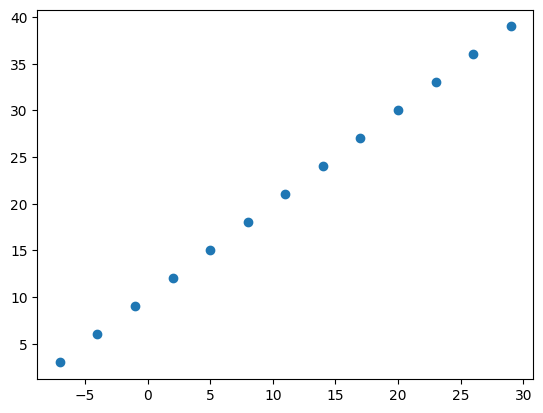

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# Input and output shapes


Create a demo tensor for our housing price prediction problem.


In [4]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [5]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((13,), (13,))

Turn our NumPy arrays into Tensors


In [6]:
X = tf.cast((tf.constant(X)), dtype = tf.float32)

y = tf.cast((tf.constant(y)), dtype = tf.float32)


X.dtype, y.dtype

(tf.float32, tf.float32)

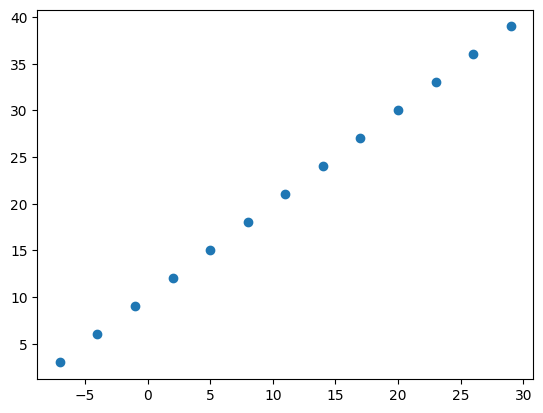

In [7]:
plt.scatter(X, y)

> ## Steps in modeling with TensorFlow

1. **Creating a model** — define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** — define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).


In [8]:

# model = tf.keras.Sequential()

# model.add(tf.keras.layers.Dense(1, input_shape = (1)))

# model.add(tf.keras.layers.Dense(1))

In [9]:
X.ndim, y.ndim

(1, 1)

In [10]:
# Set random seed

tf.random.set_seed(42)


'''             1. Create a model using the Sequential API
'''


# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape = (1, ))
# ])

# OTHER WAY OF USING THE SEQUENTIAL API

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1, input_shape = (1, )))


'''             2. Compile the model
'''

model.compile(loss = tf.keras.losses.mae, # mae is short form for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short form for stochastic gradient descent 
              metrics = ["mae"])



'''             3. Fit the model
'''

model.fit(X, y, epochs = 5)

c:\Users\Muhammad Abu Bakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 33.4278 - mae: 33.4278
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 31.9621 - mae: 31.9621
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 30.4964 - mae: 30.4964
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 29.0308 - mae: 29.0308
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 27.5651 - mae: 27.5651


In [11]:
# Check out X and y

X, y

(<tf.Tensor: shape=(13,), dtype=float32, numpy=
 array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29.],
       dtype=float32)>,
 <tf.Tensor: shape=(13,), dtype=float32, numpy=
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.],
       dtype=float32)>)

In [12]:
# Try and make a prediction using our model

num = tf.constant([17.0])

y_pred =model.predict(num)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[-7.835892]], dtype=float32)

> ## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** — Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation
   functions of each layer.

2. **Compi1ing a model** — here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model**
   — here we might fit a model for more **epochs** (leave it training for longer) or on more data ( give the model more examples to learn from) .


In [13]:


'''                                          LET'S REBUILD OUR MODEL
'''


'''             1. Creating a model.
'''

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1, ))
])


'''             2. Compiling a model.
'''

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])



'''             3. Fitting a model(This time we'll train for longer).
'''

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 20.9256 - mae: 20.9256
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 19.7056 - mae: 19.7056
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.4856 - mae: 18.4856
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 17.2656 - mae: 17.2656
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.0456 - mae: 16.0456
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.8256 - mae: 14.8256
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.6056 - mae: 13.6056
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.3856 - mae: 12.3856
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.1656 - mae: 11.1656
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 9.9456 - mae: 9.9456
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.7256 - mae: 8.7256
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 7.5056 - mae: 7.5056
Epoch 13/100
1/1 ━━━━━━━━━━━━

In [14]:
X, y

(<tf.Tensor: shape=(13,), dtype=float32, numpy=
 array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29.],
       dtype=float32)>,
 <tf.Tensor: shape=(13,), dtype=float32, numpy=
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.],
       dtype=float32)>)

In [15]:
y_pred = model.predict(tf.constant([17.0]))

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[24.707289]], dtype=float32)

In [16]:
'''                 Now we make another change
'''

'''         1. Creating a model. (This time with an extra hidden layers with 100 hidden units)
'''

model = tf.keras.Sequential([

    tf.keras.layers.Dense(50, activation = None, input_shape = (1, )),
    tf.keras.layers.Dense(1, input_shape = (1, ))
])


'''         2. Compile model
'''

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics = ["mae"])



'''         3. Fitting the model.
'''

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 21.1092 - mae: 21.1092
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 18.9384 - mae: 18.9384
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 16.7457 - mae: 16.7457
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 14.5279 - mae: 14.5279
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.2815 - mae: 12.2815
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.0037 - mae: 10.0037
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.6906 - mae: 7.6906
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.4847 - mae: 5.4847
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.7711 - mae: 5.7711
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6.8778 - mae: 6.8778
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.7138 - mae: 7.7138
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.2426 - mae: 8.2426
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
# Let's remind ourselves of the data

X, y

(<tf.Tensor: shape=(13,), dtype=float32, numpy=
 array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29.],
       dtype=float32)>,
 <tf.Tensor: shape=(13,), dtype=float32, numpy=
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.],
       dtype=float32)>)

In [18]:
y_pred = model.predict(tf.constant([31.0]))

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[40.96832]], dtype=float32)

## Evaluating a model

> Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it ->....


> ### Visualize

when it comes to evaluation...

There is a good idea to Visualize:

- The data - What data are we working with? What does it look like?

- The model itself - What does our model look like?

- The training of a model - How does model perform while it learns?

- The prediction of the model - How do the predictions of a model line up against the ground truth (the original labels)?


In [19]:
# Make a bigger data set

X = tf.range(-100, 100, 4, dtype = tf.float32)

# Make labels for the data set

y = tf.range(-90, 110, 4, dtype = tf.float32)

X, y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.], dtype=float32)>)

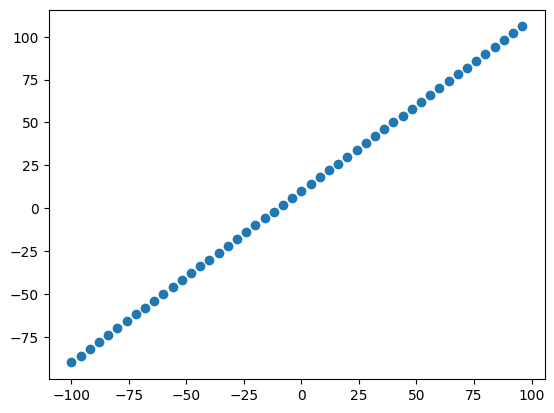

In [20]:
# Now, visualize the data

plt.scatter(X, y)

In [21]:
X.dtype, y.dtype

(tf.float32, tf.float32)

In [22]:
'''         1. Creating a model
'''

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None, input_shape = (1, )),
    tf.keras.layers.Dense(1, input_shape = (1, ))
])


'''         2. Compiling a model
'''

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])


'''         3. Fitting a model.
'''

model.fit(X, y, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 25.7208 - mae: 25.7208
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0925 - mae: 11.0925 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3307 - mae: 11.3307 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.0391 - mae: 13.0391 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5519 - mae: 9.5519 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9067 - mae: 8.9067 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8305 - mae: 9.8305 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.6124 - mae: 10.6124 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7910 - mae: 8.7910 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3024 - mae: 8.3024 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1495 - mae: 8.1495 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2090 - mae: 8.2090 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [23]:
# Remind ourselves of data

X, y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.], dtype=float32)>)

In [24]:
# let's predict the new number

y_pred = model.predict(tf.constant([96.]))

y_pred # It is almost correct

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[104.4012]], dtype=float32)

> # Three sets...

- `Training set` - the model learns from this data, which is typically 70-80% of the total data you have available.

- `Validation set` - the model gets tuned on this data, which is typically 10-15% of the total data you have available.

- `Test set` - the model gets evaluated on this data to test what is has learned, which is typically 10-15% of the total data you have available.


In [25]:
X_train = X[: 40] # this is 80% of the data.1
X_test = X[40:] # this is 20% of the data.

y_train = y[: 40] # this is 80% of the data.
y_test = y[40: ] # this is 20% of the data.



### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!


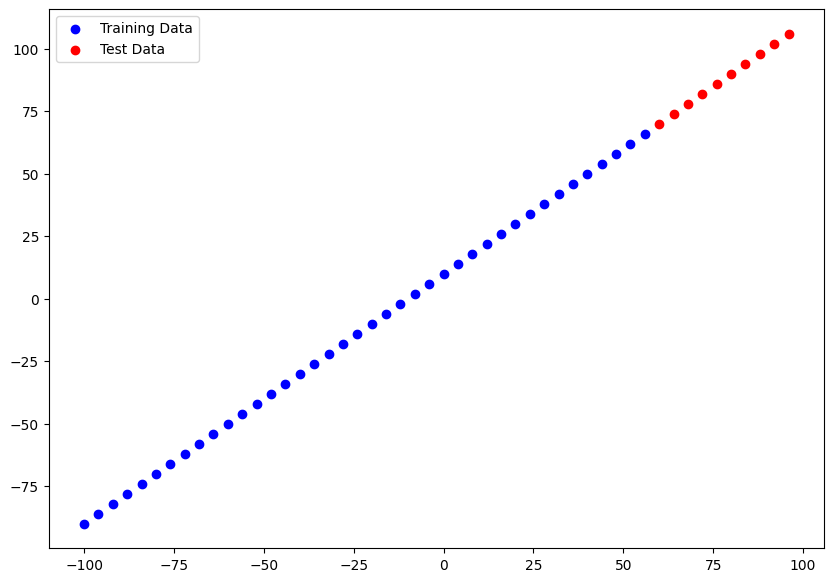

In [26]:
plt.figure(figsize = (10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training Data") # our model will learn on this

# Plot test data in red
plt.scatter(X_test, y_test, c = "r", label = "Test Data") # want our model to be able to predict this (given X, what's y?)

# Show a legend
plt.legend()

In [27]:
# Let's create model


#       1. Create the model.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "Input_Layer"),
    tf.keras.layers.Dense(1, input_shape = [1], name = "Output_Layer")
], name = "Model_1")


#       2. Compile the model.

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 27.9768 - mae: 27.9768  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4310 - mae: 23.4310 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.7341 - mae: 21.7341 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.7064 - mae: 21.7064 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1336 - mae: 19.1336 


In [28]:
model.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

- `Total Params` - Total number of parameters in the model.

- `Trainable parameters` - These are the parameters (patterns) the model can update as it trains.

- `Non-trainable parameters` - These parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **Transfer learning**)


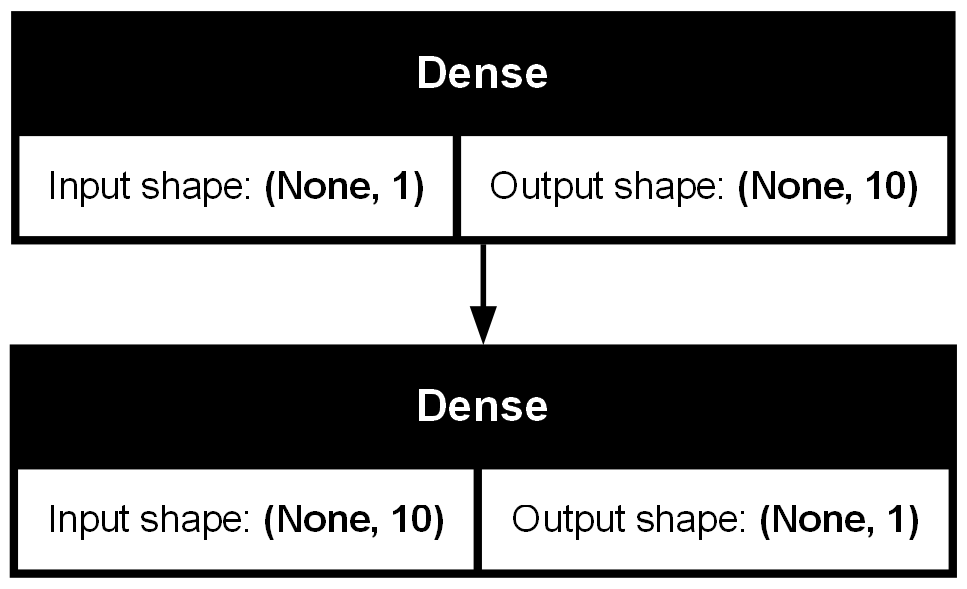

In [29]:
# Another way to visualize

from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [30]:
import keras

model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (1, ), name = "First_Layer"),
    keras.layers.Dense(50, input_shape = (1, ), name = "Second_Layer"),
    keras.layers.Dense(10, input_shape = (1, ), name = "Third_Layer"),
    keras.layers.Dense(1, input_shape = (1, ), name = "Fourth_Layer")
], name = "Model_2")

model.compile(loss = keras.losses.mean_absolute_error,
              optimizer = keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [31]:
model.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ First_Layer (Dense)             │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second_Layer (Dense)            │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Third_Layer (Dense)             │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fourth_Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,771 (22.54 KB)

 Trainable params: 5,771 (22.54 KB)

 Non-trainable params: 0 (0.00 B)

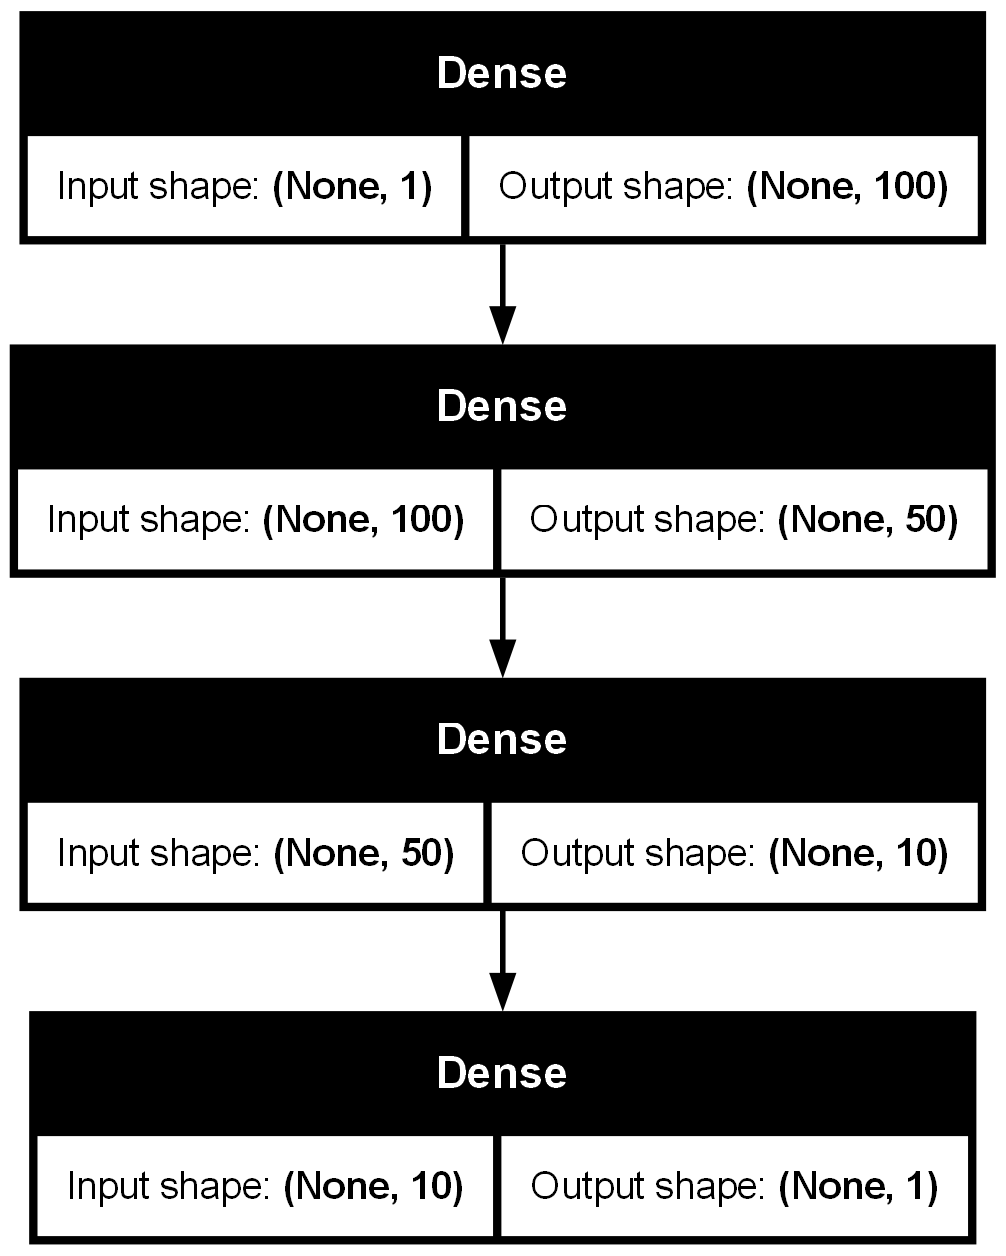

In [32]:
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

- Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).


In [33]:
#           1. Creating a model.

model = keras.Sequential([
    keras.layers.Dense(50, activation = "relu", input_shape = (1, ), name = "Input_Layer"),
    keras.layers.Dense(1, input_shape = (1, ), name = "Output_Layer")
])


#           2. Compile a model

model.compile(loss = keras.losses.mean_squared_error,
              optimizer = keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mse"])


#           3. Fitting a model.

model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1277.9410 - mse: 1277.9410
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 802.0074 - mse: 802.0074 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 510.6749 - mse: 510.6749 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 395.5215 - mse: 395.5215 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 363.6987 - mse: 363.6987 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 301.4439 - mse: 301.4439 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 206.1586 - mse: 206.1586 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 117.6067 - mse: 117.6067 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.8925 - mse: 61.8925 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.5605 - mse: 39.5605 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.4659 - mse: 37.4659 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.0104 - mse: 41.0104 
Epoch 13

In [34]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

In [35]:
X_test + 10

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [36]:
X_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>

In [37]:
y_pred = model.predict(X_test)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[ 70.91887 ],
       [ 75.157166],
       [ 79.395454],
       [ 83.65125 ],
       [ 87.92342 ],
       [ 92.19559 ],
       [ 96.46776 ],
       [100.73992 ],
       [105.01209 ],
       [109.28426 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [39]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
            train_label = y_train,
            test_data = X_test,
            test_label = y_test,
            predictions = y_pred):

    """
        Plots training data, test data and compares predictions to ground truth labels.
    """

    plt.figure(figsize = (10, 7))

    plt.scatter(train_data, train_label, c = "black", label = "Train Data")

    plt.scatter(test_data, test_label, c = "blue", label = "Test Data")

    plt.scatter(test_data, predictions, c = "red", label = "Prediction")

    plt.legend()

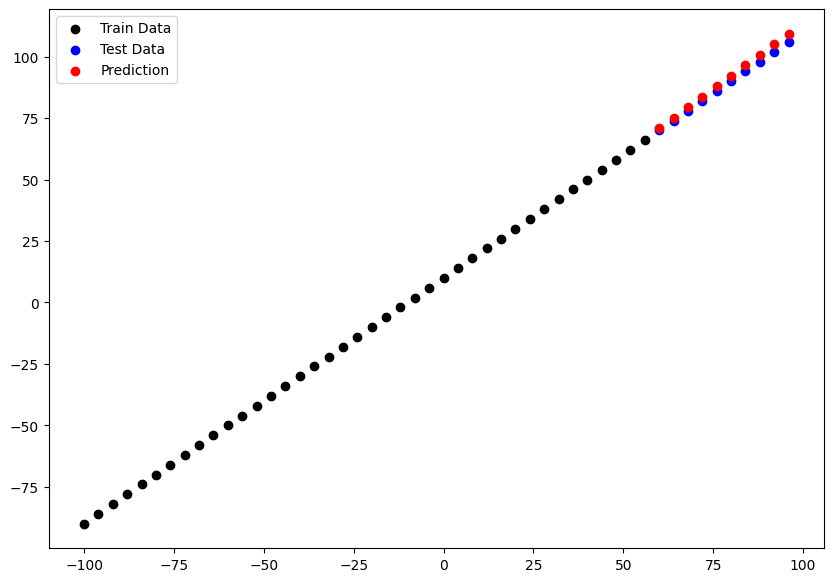

In [40]:
plot_predictions(train_data = X_train,
            train_label = y_train,
            test_data = X_test,
            test_label = y_test,
            predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics.

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

since we're working on a regression, two of the main metrics:

> - MAE - mean absolute error, "on average, how wrong is each of my model's predictions"

> - MSE - mean square error, "square the average errors"


In [41]:
#           1. Creating a model.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None, input_shape = [1]),
    tf.keras.layers.Dense(1, input_shape = [1])
])



#           2. Compiling a model.

model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mse"])



#           3. Fitting the model.

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2038.0453 - mse: 2038.0453
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 834.9946 - mse: 834.9946 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 210.6529 - mse: 210.6529 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 107.2272 - mse: 107.2272
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 281.2541 - mse: 281.2541 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 388.5110 - mse: 388.5110 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 323.9712 - mse: 323.9712 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 190.5256 - mse: 190.5256 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 96.3056 - mse: 96.3056 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.2354 - mse: 77.2354 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.0908 - mse: 107.0908 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139.4295 - mse: 139.4295 
Epoch

In [42]:
y_pred = model.predict(X_test)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[ 69.74227 ],
       [ 73.736496],
       [ 77.730736],
       [ 81.72496 ],
       [ 85.71919 ],
       [ 89.71343 ],
       [ 93.707664],
       [ 97.70189 ],
       [101.69613 ],
       [105.69037 ]], dtype=float32)

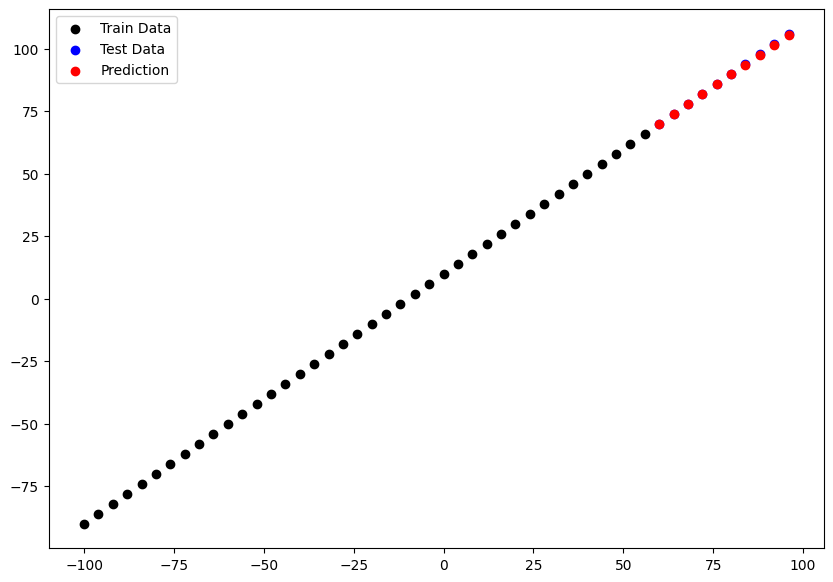

In [43]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [44]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.0808 - mse: 0.0808


[0.0807521790266037, 0.0807521790266037]

In [45]:
# Make some functions to resue MAE and MSE

def mae(y_true = y_test,
        y_pred = y_pred):
    
    return keras.losses.mean_absolute_error(y_true, tf.squeeze(y_pred))
    

def mse(y_true = y_test,
        y_pred = y_pred):
    
    return keras.losses.mean_squared_error(y_true, tf.squeeze(y_pred))
    

def huber(y_true = y_test,
          y_pred = y_pred):
    
    return keras.losses.huber(y_test, y_pred)


### Running Experiments to improve our models

1. Get more data.

2. Make your model larger - Add more layers and units.

3. Train for longer.


> ### Let's do three modelling experiments:

1. `model1_1` - same as the original model, 1 layer, trained for epochs.

2. `model1_2` - 2 layers, trained for 100 epochs.

3. `model1_3` - 2 layers, trained for 500 epocs


In [46]:
X_train.shape, y_train.shape

(TensorShape([40]), TensorShape([40]))

In [47]:
# Set random seed

tf.random.set_seed(42)

#               1. Creating a model.

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])



#               2. Compile a model.

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])



#               3. Fitting a model.

model_1.fit(X_train, y_train, epochs = 100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 22.7331 - mae: 22.7331 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9638 - mae: 9.9638   
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.6411 - mae: 11.6411 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6048 - mae: 8.6048 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.0735 - mae: 10.0735 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7866 - mae: 11.7866 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7145 - mae: 8.7145 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.1833 - mae: 10.1833 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.9351 - mae: 11.9351 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.7359 - mae: 12.7359 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1852 - mae: 8.1852 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8625 - mae: 8.8625 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [48]:
# Make and plot predictions for model_1

y_pred_1 = model_1.predict(X_test)

y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[54.034645],
       [57.54258 ],
       [61.050514],
       [64.55845 ],
       [68.06638 ],
       [71.57432 ],
       [75.08225 ],
       [78.59019 ],
       [82.09812 ],
       [85.60606 ]], dtype=float32)

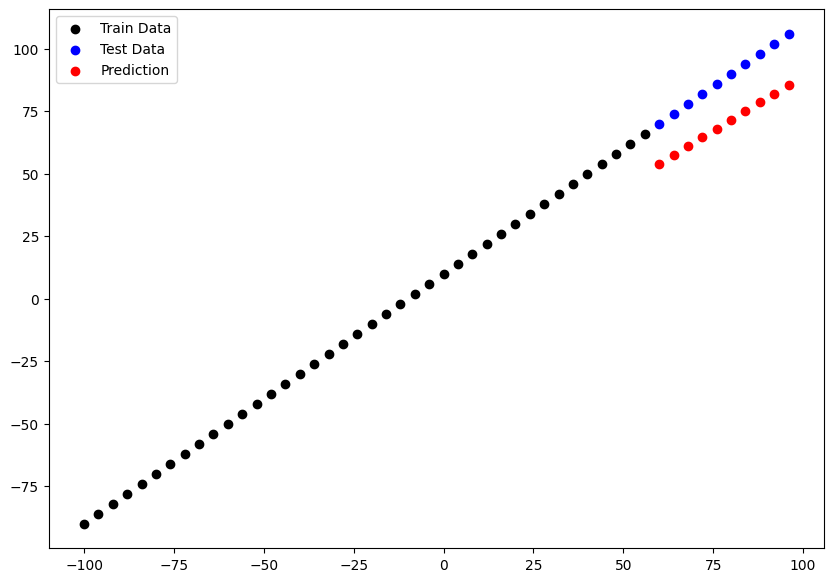

In [49]:
plot_predictions(predictions = y_pred_1)

In [50]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.17965>,
 <tf.Tensor: shape=(), dtype=float32, numpy=332.49722>)

**Build `model_2`**

- 2 Dense layers, trained for 100 epochs


In [51]:
#               1. Creating a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1]),
    tf.keras.layers.Dense(1, input_shape = [1])
])



#               2. Compile a model

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])



#               3. Fitting a model

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.7604 - mse: 314.4233  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.9595 - mse: 1233.8207 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.4267 - mse: 171.9345
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5238 - mse: 292.5907 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.1964 - mse: 275.1877 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.4922 - mse: 239.0000 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.9766 - mse: 419.7394 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6467 - mse: 123.3277
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.7459 - mse: 129.2646 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8639 - mse: 160.7361 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.0181 - mse: 219.0589 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5493 - mse: 347.4013 
Epoch 13/100
2

In [52]:
y_pred_2 = model_2.predict(X_test)

y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[35.831688],
       [38.089115],
       [40.346546],
       [42.603973],
       [44.8614  ],
       [47.11883 ],
       [49.376255],
       [51.633686],
       [53.89111 ],
       [56.14854 ]], dtype=float32)

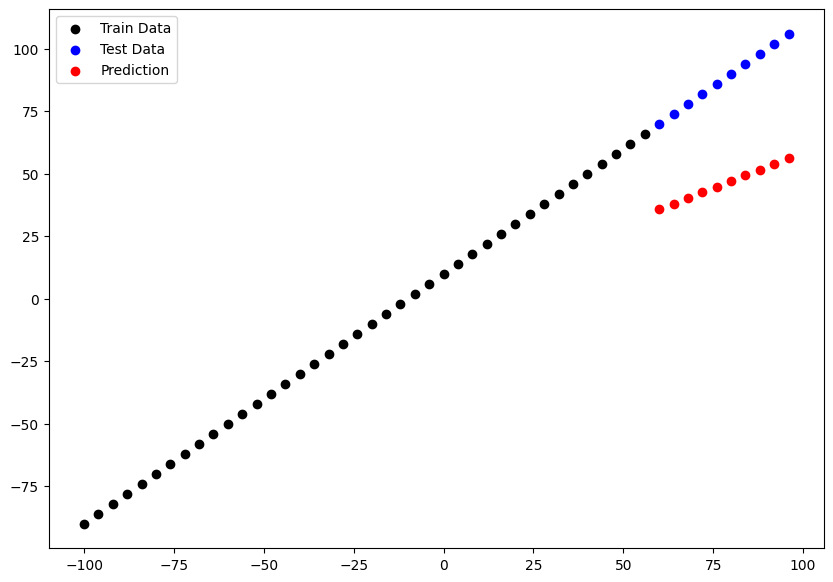

In [53]:
plot_predictions(predictions = y_pred_2)

In [54]:
mae_2 = mae(y_pred = y_pred_2)
mse_2 = mse(y_pred = y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=42.009884>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1789.8821>)

**Bulid `model_3`**

- 2 Dense layers trained for, 500 epochs


In [55]:
#               1. Creating a model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1]),
    tf.keras.layers.Dense(1, input_shape = [1])
])



#               2. Compile a model

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])



#               3. Fit the model

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.3482 - mae: 8.3482  
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.5331 - mae: 53.5331 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.1689 - mae: 17.1689 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.4905 - mae: 13.4905 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.6144 - mae: 22.6144 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4919 - mae: 9.4919 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.3325 - mae: 12.3325 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.0099 - mae: 14.0099 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1710 - mae: 13.1710 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.8821 - mae: 15.8821 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.5109 - mae: 10.5109
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5731 - mae: 11.5731 
Epoch 13/500
2/2 ━━━━━━━━━━━━

In [56]:
y_pred_3 = model_3.predict(X_test)

y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[ 70.688194],
       [ 74.898026],
       [ 79.10786 ],
       [ 83.31769 ],
       [ 87.52753 ],
       [ 91.73735 ],
       [ 95.94718 ],
       [100.15701 ],
       [104.366844],
       [108.57669 ]], dtype=float32)

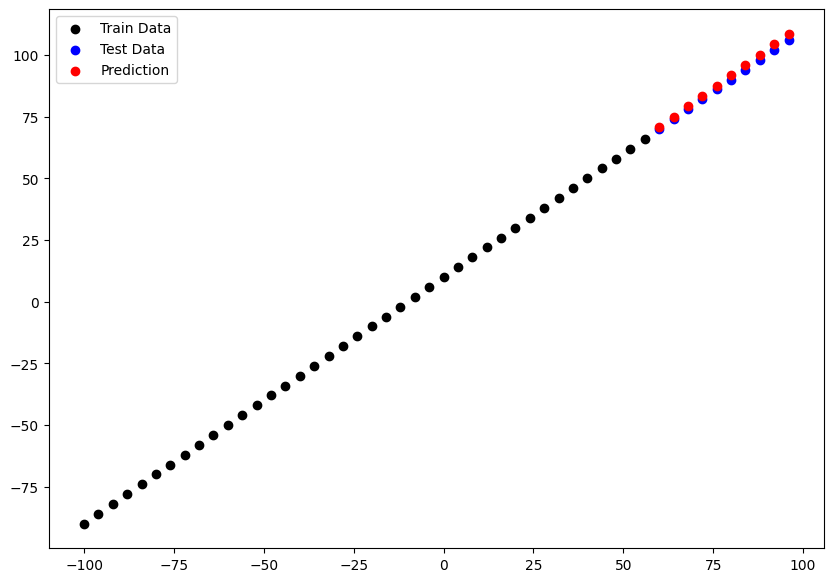

In [57]:
# Let's plot predictions

plot_predictions(predictions = y_pred_3)

In [58]:
# evaluate the model_3

mae_3 = mae(y_pred = y_pred_3)
mse_3 = mse(y_pred = y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6324371>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.028094>)

**Build `model_4`**

- 2 Dense layers, trained for 200 epochs
- Using Adam optimizer


In [59]:
#               1. Creating a model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1]),
    tf.keras.layers.Dense(1, input_shape = [1])
])



#               2. Compile a model

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["mae"])



#               3. Fit the model

model_4.fit(X_train, y_train, epochs = 200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20.1342 - mae: 20.1342  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.9335 - mae: 13.9335 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7831 - mae: 8.7831 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8761 - mae: 8.8761 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.3328 - mae: 10.3328 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.5120 - mae: 10.5120 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8316 - mae: 9.8316 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5587 - mae: 8.5587 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2110 - mae: 7.2110 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0930 - mae: 8.0930 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3206 - mae: 8.3206 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6932 - mae: 7.6932 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [60]:
y_pred_4 = model_4.predict(X_test)

y_pred_4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[ 69.41903 ],
       [ 73.380554],
       [ 77.34207 ],
       [ 81.30359 ],
       [ 85.26511 ],
       [ 89.22662 ],
       [ 93.18814 ],
       [ 97.149666],
       [101.111176],
       [105.0727  ]], dtype=float32)

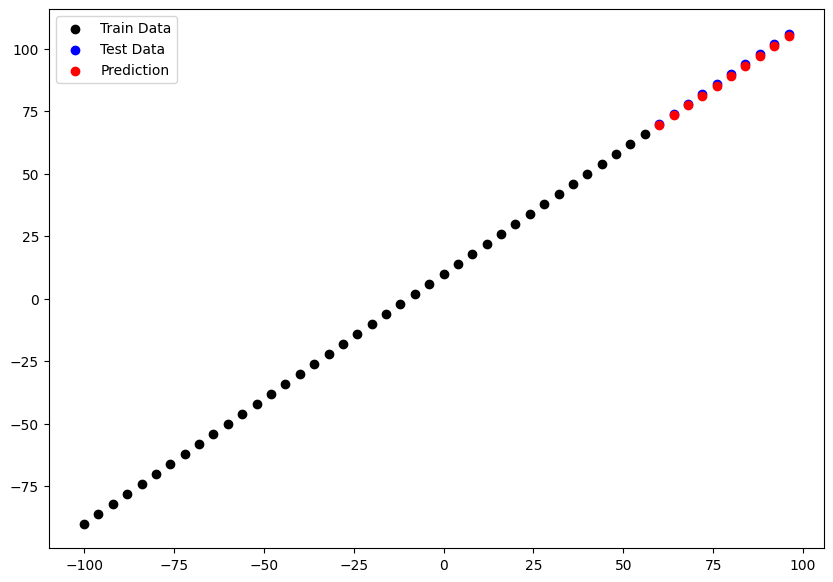

In [61]:
# Let's plot predictions

plot_predictions(predictions = y_pred_4)

In [62]:
# Evaluate the model_4

mae_4 = mae(y_pred = y_pred_4)
mse_4 = mse(y_pred = y_pred_4)

mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.75413436>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.58093554>)

In [63]:
import pandas as pd

models = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()],
    ["model_4", mae_4.numpy(), mse_4.numpy()]
]

pd.DataFrame(models, columns = ["Models" , "mae", "mse"])

,Models,mae,mse
0,model_1,18.179649,332.497223
1,model_2,42.009884,1789.882080
2,model_3,1.632437,3.028094
3,model_4,0.754134,0.580936


> ### Saving a model
>
> There are two formats to save model
>
> * The SavedModel format. (Default).
>
> * The HDF5 format

In [64]:
model_4.save("../Saved Models/Best_model.h5")

> ### Loading a model

In [65]:
load_saved_model_4 = tf.keras.models.load_model("../Saved Models/Best_model.h5")

load_saved_model_4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [66]:
load_saved_model_4_preds = load_saved_model_4.predict(X_test)

load_saved_model_4_preds == y_pred_4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])